<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/Diamond_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **💎 Diamond Prices Dataset**

This dataset contains detailed information on over 54,000 diamonds, including their physical characteristics and prices. It’s commonly used for regression modeling, exploratory data analysis, and visualization projects.

> ## Context

Diamonds are priced based on several key attributes such as **carat**, **cut**, **color**, and **clarity**—the so-called 4Cs. This dataset captures these alongside physical measurements like **x**, **y**, **z** dimensions and calculated attributes like **depth** and **table**.

It is ideal for:
- Regression modeling with machine learning
- Understanding the relationships between diamond characteristics and price
- Practicing data preprocessing and feature engineering

> ## Dataset Content

| Feature   | Description |
|-----------|-------------|
| `price`   | Price in US dollars (USD) ranging from \$326 to \$18,823 |
| `carat`   | Weight of the diamond (0.2 – 5.01 carats) |
| `cut`     | Quality of the cut: `Fair`, `Good`, `Very Good`, `Premium`, `Ideal` |
| `color`   | Diamond color, from `J` (worst) to `D` (best) |
| `clarity` | Clarity grading: `I1` (worst), `SI2`, `SI1`, `VS2`, `VS1`, `VVS2`, `VVS1`, `IF` (best) |
| `x`       | Length in mm (0 – 10.74) |
| `y`       | Width in mm (0 – 58.9) |
| `z`       | Depth in mm (0 – 31.8) |
| `depth`   | Total depth percentage = 2 × z / (x + y), typical range: 43 – 79 |
| `table`   | Width of top of diamond relative to widest point, range: 43 – 95 |


### Importing Dependencies

In [4]:
# Importing tensorflow
import tensorflow as tf
print("Tensorflow we're using: ", tf.__version__)

Tensorflow we're using:  2.18.0


In [23]:
# Importing other dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

print("All the dependencies imported successfully in this notebook..")

All the dependencies imported successfully in this notebook..


### Loading the dataset

We're going to use `Diamond Price` dataset available on Kaggle. The link to the dataset is as follows:

```
Dataset -> (diamonds.csv)[https://www.kaggle.com/datasets/shivam2503/diamonds]
```

In [7]:
# Loading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DeepLearning-DL/diamonds.csv")
print("Dataset loaded successfully...")

Dataset loaded successfully...


### Understanding the dataset

In [8]:
# How dataset looks like actually?
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
dataset.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


We are getting index column repeating , so let's drop it

In [11]:
dataset = dataset.drop("Unnamed: 0", axis=1)  # dropping unnamed index column
print("Successfully dropped the Unnamed column")

Successfully dropped the Unnamed column


In [12]:
# Now let's again check how our dataset looks like
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
# Let's check the columns
dataset.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [14]:
# Is there exists any null values in our dataset?
dataset.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


Perfect!! No null values in our dataset

In [15]:
# Checking if there exits different prices or not
dataset["price"].value_counts()

,count
price,
605,132
802,127
625,126
828,125
776,124
...,...
2769,1
9033,1
9027,1


### Creating Features and Labels

* Features is denoted by `X`
* Lables is denoted by `y`

In [17]:
# Creating features
X = dataset.drop("price", axis=1)  # Here we are including all the columns in X except "price"
y = dataset["price"]  # Taking only "price" in y as it is our target variable
X, y

(       carat        cut color clarity  depth  table     x     y     z
 0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
 1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
 2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
 3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
 4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
 ...      ...        ...   ...     ...    ...    ...   ...   ...   ...
 53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50
 53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61
 53937   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56
 53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74
 53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64
 
 [53940 rows x 9 columns],
 0         326
 1         326
 2         327
 3         334
 4         335
          ... 
 53935    2757
 53936    2757

In [18]:
len(X), len(y)

(53940, 53940)

### Splitting into training & testing sets

In [19]:
# We use scikit learn's train_test_split() to split the data accordingly
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)  # 25% as testing data & remaining 75% as training data

In [20]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40455, 13485, 40455, 13485)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40455, 9), (13485, 9), (40455,), (13485,))

### Preprocessing dataset

In [22]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see that , this dataset contains both numerical as well as alphabetical data. Hence, for better performance and metrics we have to convert all these into tensors aur basically normalize them

* We will use `MinMaxScaler()` for normalization of numerical data, which converts our data in a specfic range from 0 to 1
* Other thing we will use use `OneHotEncoder()`, which converts all alphabetical data into binanry codes.

In [25]:
# Using column transformers from scikit-learn
ct = make_column_transformer(
    (MinMaxScaler(), ["carat", "depth", "table", "x", "y", "z" ] ) ,
    (OneHotEncoder(handle_unknown="ignore"), ["cut", "color", "clarity"] )
)

In [26]:
# Fit the column transformer to training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['cut', 'color', 'clarity'])])

In [27]:
# Transform  training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)

Done with preprocessing, now let's check our dataset changed somehow or not

In [29]:
X_train.loc[0]

,0
carat,0.23
cut,Ideal
color,E
clarity,SI2
depth,61.5
table,55.0
x,3.95
y,3.98
z,2.43


In [30]:
X_train_normalized[0]

array([0.01039501, 0.60833333, 0.28846154, 0.36778399, 0.06740238,
       0.08081761, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

Woah! Everything in numerically encoded now
From now we will use `X_train_normalized` and `X_test_normalized` for our model building.

### Building model

In [31]:
# Let's start building model
tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model
diamond_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
diamond_model.compile(loss = tf.keras.losses.mae,
                      optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics=["mae"])

# 3. Fit the model
diamond_model.fit(X_train_normalized, y_train, epochs=500)

Epoch 1/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3126.7073 - mae: 3126.7073
Epoch 2/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1954.8906 - mae: 1954.8906
Epoch 3/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 878.2418 - mae: 878.2418
Epoch 4/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 863.7855 - mae: 863.7855
Epoch 5/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 853.3352 - mae: 853.3352
Epoch 6/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 843.7292 - mae: 843.7292
Epoch 7/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 834.5927 - mae: 834.5927
Epoch 8/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 825.9321 - mae: 825.9321
Epoch 9/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 817.7641 - mae: 817.7641
Epoch 10/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 809.7005 - mae: 809.7005
Epoch 11/500
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 801.9002 - mae: 801.9002
Epoch 12/500
1265/1265 ━━━

In [32]:
y_train.median(), y_train.mean()

(2400.0, np.float64(3942.5383018168336))

In [33]:
# Let's evaluate model
diamond_model.evaluate(X_test_normalized, y_test)

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 637.9059 - mae: 637.9059


[636.7247314453125, 636.7247314453125]

Alright nice ! We are getting a reasonable MAE score.

In [34]:
# Let's make predictions
y_pred = diamond_model.predict(X_test_normalized)
y_pred

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[ 713.706 ],
       [2162.8125],
       [1245.0444],
       ...,
       [7294.53  ],
       [4346.7773],
       [4590.9097]], dtype=float32)

In [41]:
diamond_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,405 (91.43 KB)

 Trainable params: 7,801 (30.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,604 (60.96 KB)

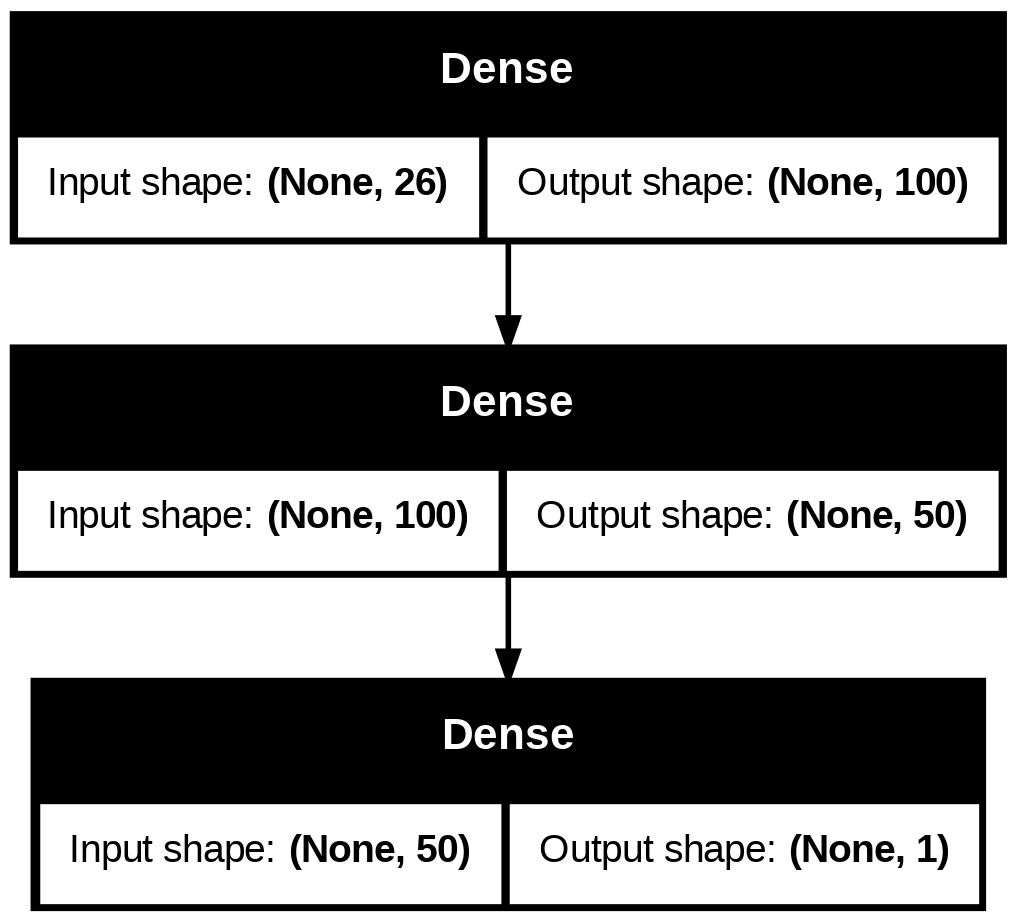

In [42]:
plot_model(model=diamond_model, show_shapes=True)